In [1]:
#Import neccesary packages
import torch
import numpy as np
import pandas as pd
import model
import data
import sklearn
import pickle
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pylab

# Pretrained Word Embeddings

Using pretrained GloVe 6 Billion Tokens embeddings

To download, please go to: http://nlp.stanford.edu/data/glove.6B.zip

To download more complex version: https://nlp.stanford.edu/projects/glove/

In [89]:
#Specify GloVe embeddings files directory
glove_home = '../../datasets/glove.6B/'

#Import only a portion of words for testing
words_to_load = 50000

import numpy as np

#Using 50 dimension embeddding for testing
with open(glove_home + 'glove.6B.50d.txt') as f:
    loaded_embeddings = np.zeros((words_to_load, 50))
    words = {}
    ordered_words = []
    for i, line in enumerate(f):
        if i >= words_to_load: 
            break
        
        s = line.split()
        loaded_embeddings[i, :] = np.asarray(s[1:])
        words[s[0]] = i
        ordered_words.append(s[0])

In [91]:
#save 100 dimension embeddings
with open(glove_home + 'glove.6B.100d.txt') as f:
    loaded_embeddings_100d = np.zeros((words_to_load, 100))
    words_100d = {}
    ordered_words_100d = []
    for i, line in enumerate(f):
        if i >= words_to_load: 
            break
        
        s = line.split()
        loaded_embeddings_100d[i, :] = np.asarray(s[1:])
        words_100d[s[0]] = i
        ordered_words_100d.append(s[0])

To access the word embedding of certain word use the format loaded_embedings[words['someword']]

In [102]:
#Example:
loaded_embeddings[words['something']]

array([ 0.39533  , -0.0064782, -0.26112  , -0.32292  ,  0.96181  ,
        0.11242  , -0.30927  ,  0.17085  , -0.38948  ,  0.77584  ,
       -0.31334  ,  0.54971  , -0.4579   ,  0.05835  ,  1.0643   ,
        0.57949  ,  0.74198  ,  0.22064  ,  0.11507  , -0.84422  ,
       -0.43365  ,  0.52626  ,  0.067037 ,  0.16294  ,  1.1345   ,
       -2.0336   , -1.211    ,  0.69115  ,  1.418    , -0.80188  ,
        3.0172   ,  0.36111  , -0.38275  , -0.51099  , -0.19531  ,
       -0.16375  , -0.024037 ,  0.32332  , -0.0070115, -0.49139  ,
       -0.28394  ,  0.06881  , -0.11819  ,  0.47825  ,  0.16551  ,
        0.29805  ,  0.010174 ,  0.20346  , -0.13682  ,  0.79782  ])

# How to access saved model and its embedding
(For t-SNE plotting)
An example of trained model file outputed by main.py can be obtained by simply running 
python main.py

In [3]:
test_model = torch.load('./saved_models/baseline_20epcs.pt')

/home/simonlzr/anaconda3/lib/python3.5/site-packages/torch/serialization.py:284: SourceChangeWarning: source code of class 'model.RNNModel' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/simonlzr/anaconda3/lib/python3.5/site-packages/torch/serialization.py:284: SourceChangeWarning: source code of class 'torch.nn.modules.sparse.Embedding' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/simonlzr/anaconda3/lib/python3.5/site-packages/torch/serialization.py:284: SourceChangeWarning: source code of class 'torch.nn.modules.rnn.LSTM' has changed. you can retrieve the original source code by accessing the object's source 

In [6]:
#Access embedding encoder
embeddings = test_model.encoder

In [10]:
#Access the embedding of certain index
index = torch.autograd.Variable(torch.cuda.LongTensor([1]))
print(embeddings(index).data.cpu().numpy())

[[ 0.05410157  0.00914382 -0.02619506 -0.03508313 -0.10940051  0.11662303
  -0.0391235   0.14047623 -0.01419645 -0.0583433   0.15861873  0.08402319
  -0.02805875  0.08336291  0.3064045   0.14163132 -0.05227244 -0.01660749
  -0.00345682 -0.06356572  0.02832948  0.14776705  0.14149755  0.08763231
  -0.01289891  0.07681017 -0.08612793 -0.021301   -0.09356862 -0.16724671
   0.11338127  0.19931795  0.01676324  0.13795891 -0.15934202 -0.09487032
  -0.02861047  0.05946425  0.10910583 -0.0162857  -0.15224901  0.05008053
  -0.09350243 -0.07216047 -0.05812501  0.05326393  0.16828595  0.0536381
   0.09615086 -0.04556962]]


In [11]:
embeddings.weight.data


-5.2947e-02 -6.0556e-02  3.0369e-01  ...   7.4769e-02 -2.2228e-01 -3.3333e-02
 5.4102e-02  9.1438e-03 -2.6195e-02  ...   5.3638e-02  9.6151e-02 -4.5570e-02
 7.1613e-02 -1.1282e-01  3.3638e-02  ...   2.3517e-02  5.2494e-02  3.9618e-02
                ...                   ⋱                   ...                
-4.1156e-01  2.7232e-01 -3.3668e-01  ...  -2.8468e-01  7.3748e-02  1.9785e-01
-9.2592e-02 -1.9704e-01  1.6453e-01  ...   1.8624e-01 -1.4785e-01 -3.7434e-02
 2.3761e-02  2.9175e-01 -4.9306e-01  ...   3.1733e-01 -3.8825e-01 -4.7934e-02
[torch.cuda.FloatTensor of size 10000x50 (GPU 0)]

In [3]:
# Or load saved infosheets
import pickle
with open('info.pk','rb') as f:
    info = pickle.load(f)

In [4]:
embeddings = info['embeddings']

# Investigate Corpus

Using data.Corpus function in torch to tokenize corpus in specified directory. 

In [2]:
corpus = data.Corpus('../Starter_Codes/data/penn')
corpus_gutenberg = data.Corpus('../Starter_Codes/data/gutenberg/')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 3044: invalid continuation byte

Corpus.dictionary module comes with handy lookup function between words and their associated index.

In [95]:
# Access word using index
print(corpus.dictionary.idx2word[1070])
# Access index using word
print(corpus.dictionary.word2idx['apple'])

opened
1410


# Embedding Initialization

Can use the following codes to initialize embeddings weight before training. For those words does not existed in loaded pretrained GloVe embeddings, initialized them with uniform distribution between -1 and 1.

In [96]:
initial_emb_weights = np.zeros(10000*50).reshape(10000,50)
unitialized_words = []
for idx,word in enumerate(corpus.dictionary.idx2word):
    try:
        initial_emb_weights[idx,:] = loaded_embeddings[words[word]]
    except:
        unitialized_words.append(word)
        initial_emb_weights[idx,:] = np.random.uniform(size=50,low=-1,high=1)
np.save('penn_Glove_10000.npy',initial_emb_weights)

In [103]:
initial_emb_weights = np.zeros(10000*100).reshape(10000,100)
unitialized_words = []
for idx,word in enumerate(corpus.dictionary.idx2word):
    try:
        initial_emb_weights[idx,:] = loaded_embeddings_100d[words_100d[word]]
    except:
        unitialized_words.append(word)
        initial_emb_weights[idx,:] = np.random.uniform(size=100,low=-1,high=1)
np.save('penn_Glove_10000_100d.npy',initial_emb_weights)

Let's check how many words are initialized with pretrained embeddings.

In [104]:
'%s out of 10000' % (10000-len(unitialized_words))

'9290 out of 10000'

In [73]:
#Initialize embeddings in torch
testModel = model.RNNModel('LSTM', 10000, 50, 50, 2,0.5)
testModel.cuda()

RNNModel (
  (encoder): Embedding(10000, 50)
  (rnn): LSTM(50, 50, num_layers=2, bias=False)
  (decoder): Linear (50 -> 10000)
  (dropout): Dropout (p = 0.5)
)

In [76]:
initial_emb_weights = np.load('penn_Glove_10000.npy')
testModel.encoder.weight.data.copy_(torch.from_numpy(initial_emb_weights))


 1.2976e+00 -6.8898e-01  5.8863e-02  ...   1.5561e+00  1.2506e-01  6.1730e-01
-7.7372e-01 -4.3496e-01  4.9961e-01  ...   1.0488e+00 -3.9849e-02 -7.0361e-01
-8.5009e-01 -7.1816e-01 -7.6551e-01  ...  -2.3225e-01  1.1812e-01  6.7138e-02
                ...                   ⋱                   ...                
 9.6991e-01  2.6161e-01  1.2579e+00  ...   5.7370e-01 -1.2297e+00  6.4438e-01
-1.6767e-01 -7.0546e-01  3.8829e-01  ...   3.7024e-01 -2.6469e-01  5.2524e-01
 5.7114e-01  2.2081e-01 -9.1496e-01  ...   1.3575e-01 -3.7129e-01  4.2618e-02
[torch.cuda.FloatTensor of size 10000x50 (GPU 0)]

# t-sne ploting

Ignore the following lines if we are using numpy embedding weights file.

In [77]:
# Using sklearn.manifold.TSNE package
# Documentation: http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
#index_to_plot = torch.autograd.Variable(torch.LongTensor(np.arange(0,50,1)))
#Embeddings_to_plot = embeddings(index_to_plot).data

Let's check how well GloVe represents words cluster

In [78]:
####Using preloaded embeddings
Embeddings_to_plot = initial_emb_weights

Use TSNE package to get the 2D representations of embeddings.

In [79]:
from sklearn.manifold import TSNE
TSNE_model = TSNE(n_components=2,random_state=0)

In [80]:
#Transfer to 2 dimensions
representations2D = TSNE_model.fit_transform(Embeddings_to_plot)

In [81]:
#words_to_plot = corpus.dictionary.idx2word[:50]

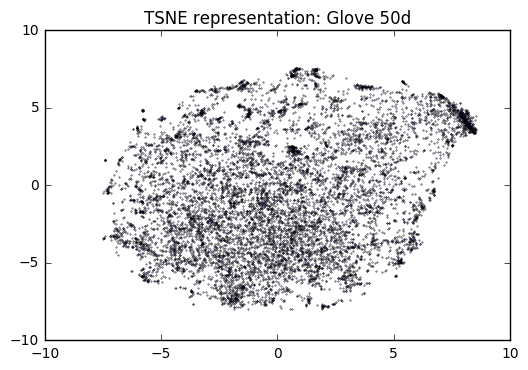

In [82]:
plt.scatter(representations2D[:,0],representations2D[:,1],s=0.1)
#for word_idx,word in enumerate(words_to_plot):
#    plt.annotate(word,representations2D[word_idx])
#plt.xlim([-100,100])
#plt.ylim([-100,100])
plt.title('TSNE representation: Glove 50d')
plt.show()

Let's Look at some trained embeddings diagram

In [6]:
with open('info_dict/LSTM_2_100_500_30epcs.pk','rb') as f:
            info_dict = pickle.load(f)
Embeddings_LSTM_2_100_500_30epcs = info_dict['embeddings']
representations2D = TSNE_model.fit_transform(Embeddings_LSTM_2_100_500_30epcs)

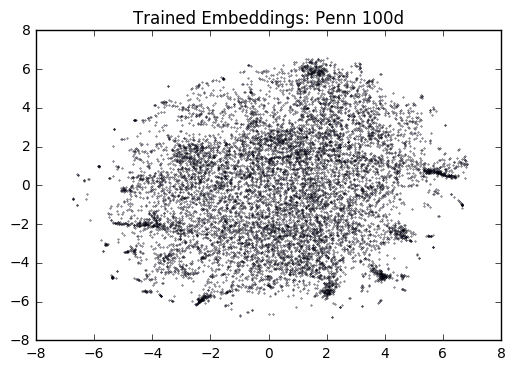

In [27]:
pylab.scatter(representations2D[:,0],representations2D[:,1],s=0.1)
#for word_idx,word in enumerate(words_to_plot):
#    plt.annotate(word,representations2D[word_idx])
plt.title('Trained Embeddings: Penn 100d')
plt.show()

## Clustering of Embeddings

In [44]:
kmeans = KMeans(init='k-means++', n_clusters=30, n_init=10)
kmeans.fit(representations2D)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=30, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

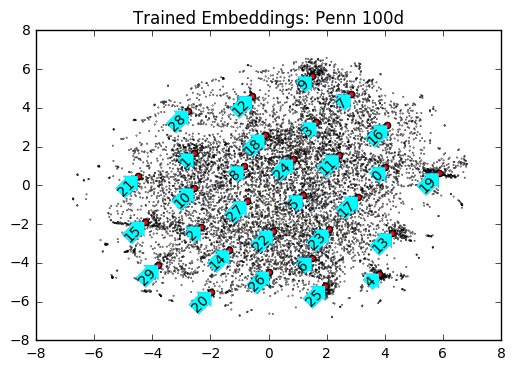

In [68]:
pylab.scatter(representations2D[:,0],representations2D[:,1],s=0.1,c=kmeans.labels_,cmap=pylab.cm.magma)
pylab.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='r')
bbox_props = dict(boxstyle="rarrow", fc="cyan",pad=0.001, ec="b", lw=0.1)
for center_idx,center in enumerate(kmeans.cluster_centers_):
    pylab.annotate(center_idx,center,bbox=bbox_props,rotation=45,va='top',ha='right')
#for word_idx,word in enumerate(words_to_plot):
#    plt.annotate(word,representations2D[word_idx])
plt.title('Trained Embeddings: Penn 100d')
plt.show()

We did see some significant cluster such as cluster 4, cluster 13 cluster 19 cluster 25. We can investigate those clusters qualitatively and see whether the word embeddings represents some words syntatic relations.